## 1.1 Packages & Libraries

In [145]:
#!pip install split-folders
#!pip install pydot
#!pip install graphviz
#!pip install keras
#!pip install visualkeras

import numpy as np
import os
import glob
import pandas as pd
import cv2
from tqdm import tqdm
import io
import tensorflow.keras
import sklearn
import pydot
import graphviz
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.optim.lr_scheduler import StepLR

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras

from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Dense, Activation
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import IPython
import scikitplot as skplt

## 1.2 Specify a classification class

In [146]:
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

## 1.3 Data Split (training:test = 8:2)

In [ ]:
#import splitfolders
#splitfolders.ratio("C:/archive/Training", output="C:/archive/Out", seed=1234, ratio=(.8, .2))

## 1.4.1 Building 'ImageDataGenerator(IDG)'

In [41]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255 # rescale
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255) # rescale

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255) # rescale

Copying files: 5712 files [00:23, 243.57 files/s]


## 1.4.2 Apply IDG by data set

In [212]:
train_dir = "C:/archive/Train"
validation_dir = "C:/archive/Validation"
test_dir = "C:/archive/Test"

train_generator = train_datagen.flow_from_directory(
        # 타겟 디렉터리
        train_dir,
        target_size =(150, 150),
        batch_size=15,
        class_mode='categorical') #주어진 데이터는 4개의 클래스가 있으므로 'categorical'

validation_generator = validation_datagen.flow_from_directory(
        # 타겟 디렉터리
        validation_dir,
        target_size =(150, 150),
        batch_size=15,
        class_mode='categorical') #주어진 데이터는 4개의 클래스가 있으므로 'categorical'

test_generator = test_datagen.flow_from_directory(
        # 타겟 디렉터리
        test_dir,
        target_size =(150, 150),
        batch_size=15,
        class_mode='categorical') #주어진 데이터는 4개의 클래스가 있으므로 'categorical'

x_train, y_train = train_generator.next()
x_validation, y_validation = validation_generator.next()
x_test, y_test = test_generator.next()

Found 4568 images belonging to 4 classes.
Found 1144 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


## 2.5 'Mini-VGGNet' Model<Br>
Architecture:  (Convolution-64*2 + ReLu + MaxPooling) + (Convolution-128*2 + ReLu + MaxPooling) +(Convolution-256*2 + ReLu + MaxPooling) + (Convolution-512*2 + ReLu + MaxPooling) + F.C layer_512*2 + softmax layer(분류)

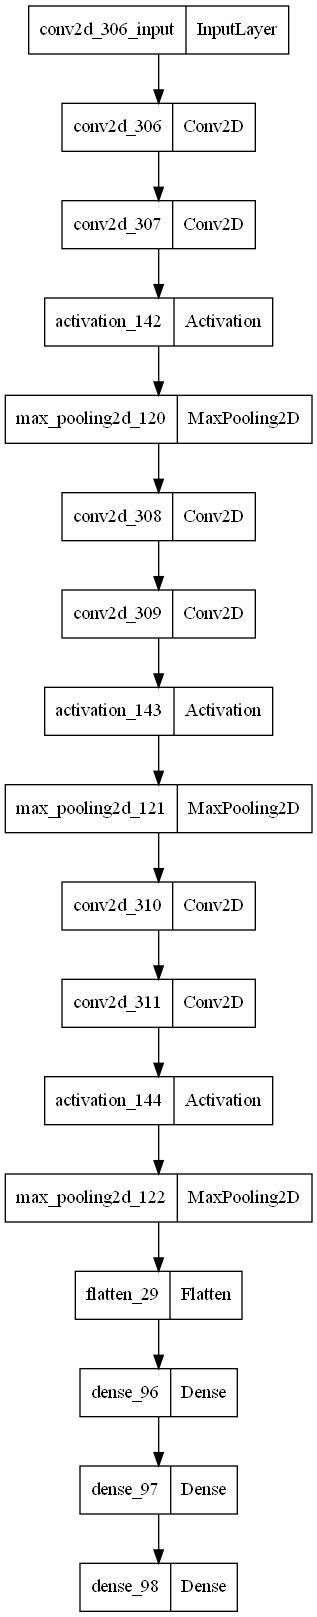

In [253]:
model = models.Sequential()
model.add(layers.Conv2D(64,  kernel_size=(3, 3),
                        padding = 'same',
                        input_shape=(150, 150, 3)))
model.add(layers.Conv2D(64,  kernel_size=(3, 3),
                        padding = 'same'))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128,  kernel_size=(3, 3),
                        padding = 'same'))
model.add(layers.Conv2D(128,  kernel_size=(3, 3),
                        padding = 'same'))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256,  kernel_size=(3, 3),
                        padding = 'same'))
model.add(layers.Conv2D(256,  kernel_size=(3, 3),
                        padding = 'same'))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten()) # F.C layer에 넣기 위한 flatten
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) # 분류를 위한 활성함수

model.summary
tensorflow.keras.utils.plot_model(model)

## 2.5.1 'Mini-VGGNet' Model Compile

In [254]:
model.compile(loss='categorical_crossentropy', # 손실함수
              optimizer= 'adam', # 최적화 알고리즘
              metrics=['accuracy'])  # 평가척도

## 2.5.2 'Mini-VGGNet' Model train

In [240]:
history=model.fit(
            train_generator,
            steps_per_epoch=15,
            epochs=25,
            validation_data=validation_generator,
            validation_steps=5
            )

Epoch 1/25
15/15 [==============================] - 74s 5s/step - loss: 1.5843 - accuracy: 0.3467 - val_loss: 1.3577 - val_accuracy: 0.4267
Epoch 2/25
15/15 [==============================] - 71s 5s/step - loss: 1.2217 - accuracy: 0.4000 - val_loss: 1.2161 - val_accuracy: 0.4267
Epoch 3/25
15/15 [==============================] - 70s 5s/step - loss: 1.2163 - accuracy: 0.4356 - val_loss: 1.1549 - val_accuracy: 0.4267
Epoch 4/25
15/15 [==============================] - 72s 5s/step - loss: 1.0964 - accuracy: 0.5244 - val_loss: 1.0555 - val_accuracy: 0.5467
Epoch 5/25
15/15 [==============================] - 73s 5s/step - loss: 0.8719 - accuracy: 0.6489 - val_loss: 1.1083 - val_accuracy: 0.6000
Epoch 6/25
15/15 [==============================] - 67s 5s/step - loss: 1.0526 - accuracy: 0.5911 - val_loss: 0.8707 - val_accuracy: 0.5867
Epoch 7/25
15/15 [==============================] - 69s 5s/step - loss: 0.8767 - accuracy: 0.6267 - val_loss: 0.7886 - val_accuracy: 0.7200
Epoch 8/25
15/15 [==

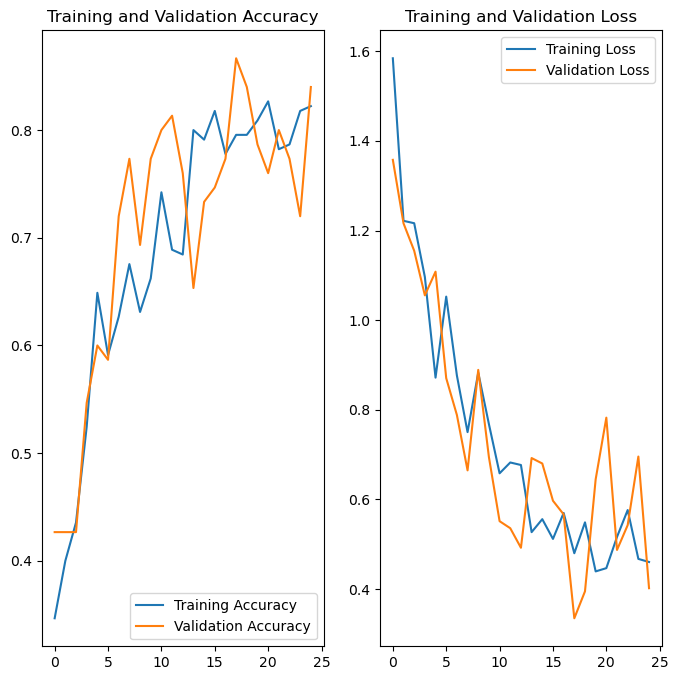

In [241]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = 25
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [242]:
print("-- Evaluate --")
scores = model.evaluate(validation_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
5/5 [==============================] - 6s 1s/step - loss: 0.3633 - accuracy: 0.8533
accuracy: 85.33%


## 2.5.3 'Mini-VGGNet' Model evaluation

In [255]:
history=model.fit(
            train_generator,
            steps_per_epoch=15,
            epochs=40,
            validation_data=test_generator,
            validation_steps=5
            )

Epoch 1/40
15/15 [==============================] - 72s 5s/step - loss: 1.6656 - accuracy: 0.3689 - val_loss: 1.3766 - val_accuracy: 0.1867
Epoch 2/40
15/15 [==============================] - 73s 5s/step - loss: 1.3056 - accuracy: 0.4404 - val_loss: 1.3764 - val_accuracy: 0.3200
Epoch 3/40
15/15 [==============================] - 75s 5s/step - loss: 1.2155 - accuracy: 0.4089 - val_loss: 1.0968 - val_accuracy: 0.4933
Epoch 4/40
15/15 [==============================] - 82s 5s/step - loss: 1.0180 - accuracy: 0.6044 - val_loss: 1.1039 - val_accuracy: 0.5467
Epoch 5/40
15/15 [==============================] - 77s 5s/step - loss: 1.1387 - accuracy: 0.5422 - val_loss: 0.9856 - val_accuracy: 0.5333
Epoch 6/40
15/15 [==============================] - 71s 5s/step - loss: 0.9077 - accuracy: 0.6055 - val_loss: 1.0090 - val_accuracy: 0.5467
Epoch 7/40
15/15 [==============================] - 73s 5s/step - loss: 0.8637 - accuracy: 0.6889 - val_loss: 0.8890 - val_accuracy: 0.6800
Epoch 8/40
15/15 [==